1.Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

2.Load the data

In [61]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
#data = pd.read_csv('dataset_part_2.csv')
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


3. Store the Dependent:Y[predict] and Independent variables:X

In [62]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
#X = pd.read_csv('dataset_part_3.csv')

Y = data['Class'].to_numpy()


4. Standardize the data in X then reassign it to the variable X [Independent Variables]

In [63]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

5. Use the function train_test_split to split the data X and Y into training and test data

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=2)
Y_test.shape

(18,)

In [65]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y, y_predict):
    "This function plots the confusion matrix"
    
    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

6. Create a <b>Logistic Regression</b> object and Create a <b>GridSearchCV </b>object and Fit the Logistic regression object to find the best parameters from the dictionary parameters

Tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Data Accuracy : 0.8464285714285713
Test Data Accuracy:  0.8333333333333334


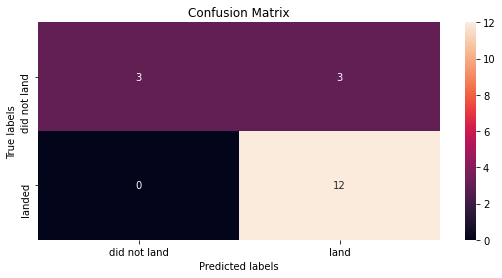

In [66]:
lr = LogisticRegression()

# l1 lasso l2 ridge
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs'] } 

#6.1 Create a GridSearchCV object and Fit the Logistic regression
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

#6.2 Display the best parameters and the accuracy on the validation data
print("Tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("Validation Data Accuracy :", logreg_cv.best_score_)
              
#6.3 Calculate the Accuracy on the Test Data
accuracy = logreg_cv.score(X_test,Y_test)
print("Test Data Accuracy: ", accuracy)
      
#6.4 Create the confusion matrix with Y_test and yhat
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

<b>Observation: </b> By examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the major problem is false positives

7. Create a <b>Support Vector Machine</b> object then create a <b>GridSearchCV</b> object svm_cv with cv - 10. Fit the object to find the best parameters from the dictionary parameters.

Tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Validation Data Accuracy : 0.8482142857142856
Test Data Accuracy:  0.8333333333333334


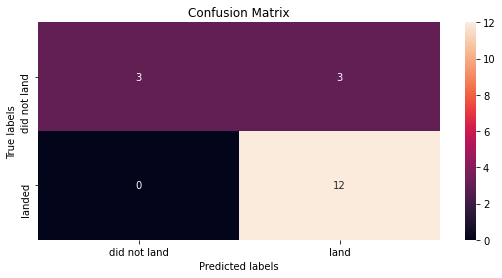

In [67]:
svm = SVC()
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'), 'C': np.logspace(-3, 3, 5), 'gamma':np.logspace(-3, 3, 5) }

#7.1 Create a GridSearchCV object and Fit the Logistic regression
svm_cv = GridSearchCV(svm, param_grid = parameters, scoring='accuracy', cv = 10)
svm_cv.fit(X_train,Y_train)

#7.2 Display the best parameters and the accuracy on the validation data
print("Tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("Validation Data Accuracy :",svm_cv.best_score_)

#7.3 Calculate the Accuracy on the Test data
svm_cv_accuracy = svm_cv.score(X_test,Y_test)
print("Test Data Accuracy: ", svm_cv_accuracy)

#7.4 Plot Confusion Matrix with Y_tes and yhat
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

8. Create a <b>Decision tree classifier</b> object then create a <b>GridSearchCV</b> object tree_cv with cv = 10. 
Fit the object to find the best parameters from the dictionary parameters

Tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Validation Data Accuracy : 0.9035714285714287
Test Data Accuracy:  0.8888888888888888


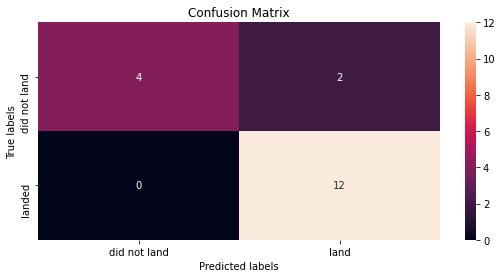

In [68]:
tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

#8.1 Create a GridSearchCV object and Fit the Logistic regression
tree_cv = GridSearchCV(tree, parameters, cv=10 )
tree_cv.fit(X_train,Y_train)

#8.2 Display the best parameters and the accuracy on the validation data
print("Tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("Validation Data Accuracy :",tree_cv.best_score_)

#8.3 Calculate the Accuracy on the Test data
tree_accuracy = tree_cv.score(X_test,Y_test)
print("Test Data Accuracy: ", tree_accuracy)

#8.4 Plot Confusion Matrix with Y_tes and yhat
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

9. Create a <b>K Nearest Neighbors</b> object then create a <b>GridSearchCV</b> object tree_cv with cv = 10. 
Fit the object to find the best parameters from the dictionary parameters

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858
Test Data Accuracy:  0.8333333333333334


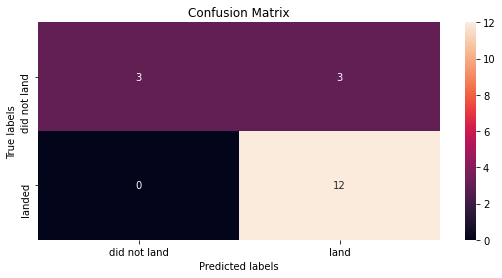

In [69]:
KNN = KNeighborsClassifier()

parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

#9.1 Create a GridSearchCV object and Fit the Logistic regression
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train,Y_train)

#9.2 Display the best parameters and the accuracy on the validation data
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

#9.3 Calculate the Accuracy on the Test data
accuracy_knn = knn_cv.score(X_test,Y_test)
print("Test Data Accuracy: ", accuracy_knn)


#9.4 Plot Confusion Matrix with Y_tes and yhat
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

10. Find the method performs best:

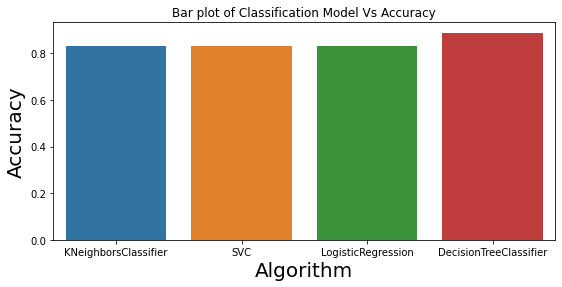

In [70]:
predictors = [knn_cv, svm_cv, logreg_cv, tree_cv]
best_predictor = ""
best_result = 0
Algorithms_dict = {}

for predictor in predictors:
    Algorithms_dict[predictor.estimator] = predictor.score(X_test, Y_test)
    
Model_Names = list(Algorithms_dict.keys())
Accuracy = list(Algorithms_dict.values())

New_Model_Names = []

for M in Model_Names:
    M = str(M)
    M = M.replace('()','')
    New_Model_Names.append(M)
    

data = { 'Algorithm': New_Model_Names, 'Accuracy' : Accuracy }

df = pd.DataFrame.from_dict(data)

sns.barplot(x="Algorithm", y="Accuracy", data=df)
plt.xlabel('Algorithm', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Bar plot of Classification Model Vs Accuracy')
plt.rcParams['figure.figsize'] = [9, 4]
plt.show()


<b>Observations: </b> All Algorithms are working fine. Among all, The Decision Tree classifier gave the best accuracy compare to remaining model.